In [2]:
!pip install transformers datasets scikit-learn
!pip install datasets transformers[torch]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requ

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

# Loading the necessary libraries

In [1]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer, Trainer, TrainingArguments
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import roc_curve, auc

In the codes above, we imported the necessary libraries for this project

### Mounting the google

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Reading Train set

In [3]:
train_file_path = '//content/drive/MyDrive/IBMWatson/train_.xlsx'
train = pd.read_excel(train_file_path)
# Display the responses
train.head(5)

,sentence,sentiment,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,جلوس سريعه و لطيفه نظافة المكان و موقعه رااائع...,5,0,0,2,18,9,10.852722,-8.912728,13,7,9.161767,-2.676521,31,16,20.014490,-11.589249
1,ضعيف لا شي مطعم قديم مره ورائحة كريهة ومنطقة ق...,1,1,0,2,21,41,9.717085,-23.400980,11,5,7.718464,-3.025179,32,46,17.435549,-26.426159
2,مناسب جدا كان الافطار لذيذا لن أعود له مرة اخر...,1,6,1,8,6,12,4.500787,-2.914270,32,23,25.664435,-9.356980,38,35,30.165222,-12.271250
3,موقع يمتاز بالخدمات وجود نظام الوجبات خارجية ع...,4,0,0,1,17,16,10.817813,-10.298694,5,2,4.542546,-1.044318,22,18,15.360359,-11.343012
4,مقبول التكييف سئ للغاية,2,0,0,0,19,21,12.519498,-10.829919,21,18,17.081514,-7.587721,40,39,29.601012,-18.417640


## Data processing

In [4]:
train_sentiment = train[['sentence','sentiment']]
train_sentiment.head(5)

,sentence,sentiment
0,جلوس سريعه و لطيفه نظافة المكان و موقعه رااائع...,5
1,ضعيف لا شي مطعم قديم مره ورائحة كريهة ومنطقة ق...,1
2,مناسب جدا كان الافطار لذيذا لن أعود له مرة اخر...,1
3,موقع يمتاز بالخدمات وجود نظام الوجبات خارجية ع...,4
4,مقبول التكييف سئ للغاية,2


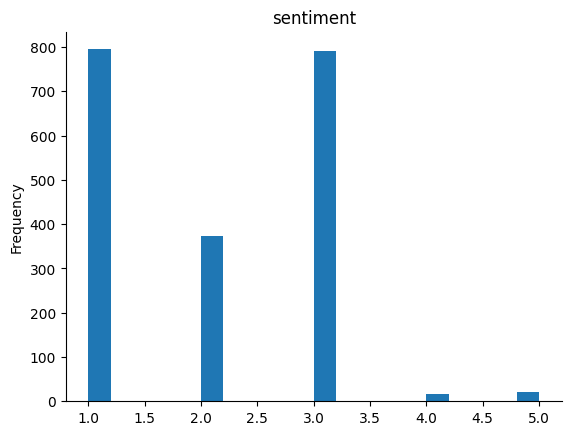

In [5]:
# title sentiment

from matplotlib import pyplot as plt
train_sentiment['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

    Data Distribution:
        The plot indicates that the sentiment data is concentrated around specific values, with notable peaks around 1.0 and 3.0.
        These peaks suggest that there are many instances in the dataset with these sentiment scores.There is a smaller but still significant number
        of instances with a sentiment value around 2.0. The sentiment values of 4.0 and 5.0 appear much less frequently in the data, as indicated by
        the small bars on the right side of the histogram.

Summary

The code effectively visualizes the distribution of sentiment scores in the dataset, revealing that certain sentiment values are much more common than others.

In [6]:
# size of the test sentiment dataset
train_sentiment.shape

(1999, 2)

In [7]:
# check missing values
train_sentiment.isnull().sum()

,0
sentence,1
sentiment,0


In [9]:
test_file_path = '//content/drive/MyDrive/IBMWatson/test_.xlsx'
test = pd.read_excel(test_file_path)
# Display the responses
test.head(5)

,sentence,sentiment,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,جلوس سريعه و لطيفه نظافة المكان و موقعه رااائع...,5,0,0,2,18,9,10.852722,-8.912728,13,7,9.161767,-2.676521,31,16,20.014490,-11.589249
1,ضعيف لا شي مطعم قديم مره ورائحة كريهة ومنطقة ق...,1,1,0,2,21,41,9.717085,-23.400980,11,5,7.718464,-3.025179,32,46,17.435549,-26.426159
2,NaN,1,6,1,8,6,12,4.500787,-2.914270,32,23,25.664435,-9.356980,38,35,30.165222,-12.271250
3,موقع يمتاز بالخدمات وجود نظام الوجبات خارجية ع...,4,0,0,1,17,16,10.817813,-10.298694,5,2,4.542546,-1.044318,22,18,15.360359,-11.343012
4,مقبول التكييف سئ للغاية,2,0,0,0,19,21,12.519498,-10.829919,21,18,17.081514,-7.587721,40,39,29.601012,-18.417640


In [15]:
train_sentiment = train[['sentence','sentiment']]

# Handle empty lines and very long sentences
train_sentiment.dropna(subset=['sentence'], inplace=True)  # Remove rows with empty sentences

# Tokenization
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Make sure to include the labels in the inputs
def preprocess_function(examples):
    return tokenizer(examples["sentence"], truncation=True, padding='max_length', return_tensors='pt')

# Use Hugging Face's Dataset.map for batch processing
dataset = Dataset.from_pandas(train_sentiment)
tokenized_train = dataset.map(preprocess_function, batched=True)

# Model and Training Arguments
# Check the number of unique sentiment classes in your dataset
num_labels = len(train_sentiment['sentiment'].unique())
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=num_labels)  # Set num_labels dynamically

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch'
)

# Convert the sentiment labels to a format suitable for the model
def format_labels(example):
    # Assuming 'sentiment' column contains labels that are not 0-indexed, adjust them
    example['labels'] = example['sentiment'] - 1
    return example

# Apply the label formatting to the dataset
tokenized_train = tokenized_train.map(format_labels)

# No need for a custom Dataset class, use the Hugging Face Dataset directly
train_dataset = tokenized_train.shuffle(seed=42) # Shuffle the dataset and set a seed for reproducibility

# Remove the 'sentence' and 'sentiment' columns as they are no longer needed
train_dataset = train_dataset.remove_columns(['sentence', 'sentiment'])

# Load and preprocess the test data
test_file_path = '//content/drive/MyDrive/IBMWatson/test_.xlsx'
test = pd.read_excel(test_file_path)

# Ensure the 'sentence' column contains strings
test['sentence'] = test['sentence'].astype(str)  # Convert the 'sentence' column to string type

# Keep the 'sentiment' column in the test dataset for label formatting
tokenized_test = Dataset.from_pandas(test[['sentence', 'sentiment']]).map(preprocess_function, batched=True)  # Include 'sentiment'
tokenized_test = tokenized_test.map(format_labels)
tokenized_test = tokenized_test.remove_columns(['sentence', 'sentiment'])  # Remove both columns after formatting

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=tokenized_test
)

# Train
trainer.train()

# Evaluation
eval_results = trainer.evaluate()
print(f"Evaluation Results: {eval_results}")

<ipython-input-15-c5226804422d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sentiment.dropna(subset=['sentence'], inplace=True)  # Remove rows with empty sentences


Map:   0%|          | 0/1998 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Map:   0%|          | 0/1998 [00:00<?, ? examples/s]

Map:   0%|          | 0/184 [00:00<?, ? examples/s]

Map:   0%|          | 0/184 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss
1,1.118300,1.133354
2,0.581500,0.800644
3,0.497200,0.751855


Evaluation Results: {'eval_loss': 0.7518550157546997, 'eval_runtime': 3.177, 'eval_samples_per_second': 57.916, 'eval_steps_per_second': 0.944, 'epoch': 3.0}


**Data Preparation**

The code starts by filtering the `train` DataFrame to retain only the columns `sentence` and `sentiment`, then removes any rows with missing sentences. Tokenization is then performed using the `DistilBertTokenizer`, converting sentences into tokens that the model can understand. The `preprocess_function` ensures that sentences are tokenized, truncated, and padded uniformly, which is essential for batch processing in neural networks. The processed data is stored in a Hugging Face Dataset object, making it easy to manipulate and feed into the model.

**Model Setup and Training Configuration**

The number of unique sentiment classes is dynamically determined from the training data to configure the DistilBERT model accordingly. The model is instantiated with the `DistilBertForSequenceClassification` class, which is tailored for classification tasks. Training arguments, such as the number of epochs, batch sizes, and logging settings, are defined using the `TrainingArguments` class. The sentiment labels are adjusted to be zero-indexed, which is a common requirement for machine learning models.

**Training and Evaluation**

The training dataset is shuffled to ensure randomness, and unnecessary columns are removed. The test data is similarly processed and tokenized. The `Trainer` class, provided by Hugging Face, is used to manage the training loop, handle the evaluation, and facilitate other training-related tasks. Finally, the model is trained on the processed dataset, and its performance is evaluated on the test dataset, with the results printed for analysis. This process enables the model to learn sentiment classification effectively and provides metrics to assess its accuracy and other performance indicators.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.05      0.02      0.02        66
           2       0.15      0.42      0.22        38
           3       0.00      0.00      0.00        69
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8

    accuracy                           0.09       184
   macro avg       0.03      0.07      0.04       184
weighted avg       0.05      0.09      0.05       184

[[ 0  0  0  0  0  0]
 [54  1 11  0  0  0]
 [ 4 18 16  0  0  0]
 [ 1  0 68  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  8  0  0  0]]


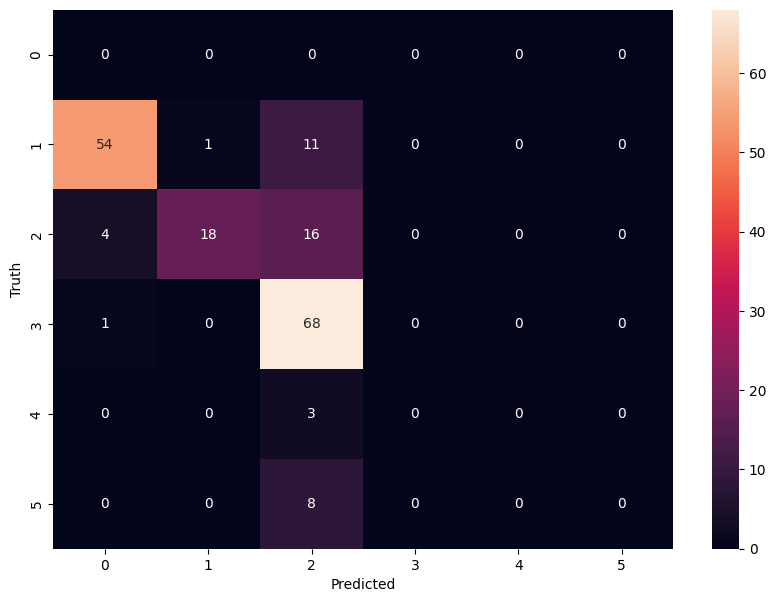

In [22]:
import warnings
warnings.filterwarnings('ignore')

# Get predictions
predictions = trainer.predict(tokenized_test)
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Assuming 'test' DataFrame contains the true labels
true_labels = test['sentiment'].tolist()  # Adjust column name if necessary

# Generate classification report and confusion matrix
print(classification_report(true_labels, predicted_labels))
print(confusion_matrix(true_labels, predicted_labels))

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

**Generating Predictions**

The code begins by suppressing warnings with warnings.filterwarnings('ignore') to keep the output clean. It then uses the trainer.predict() method to obtain predictions for the test dataset (tokenized_test). These predictions are raw logits, which are unnormalized output scores from the model. To determine the most likely sentiment class for each input, the code applies np.argmax() across the prediction axis (axis=1), converting the logits into predicted labels. This results in a list of predicted sentiment classes for the test data.

**Comparing Predictions with True Labels**

The true_labels are extracted from the original test DataFrame, specifically from the sentiment column. This list of true labels represents the actual sentiment classifications that the model is expected to predict. By comparing the predicted_labels with true_labels, the code can evaluate the accuracy of the model. The classification_report() function from the sklearn.metrics module is then used to generate a detailed report, including precision, recall, F1-score, and support for each sentiment class. Additionally, the confusion_matrix() function is called to create a matrix that shows the number of correct and incorrect predictions made by the model for each class.

**Visualizing the Confusion Matrix**

To better understand where the model's predictions deviate from the true labels, the code visualizes the confusion matrix using Seaborn's heatmap() function. The matrix is plotted as a heatmap with annotations (annot=True), displaying the actual counts in each cell. The x-axis represents the predicted labels, while the y-axis represents the true labels. This visual representation allows for easy identification of patterns or misclassifications, helping to diagnose potential weaknesses in the model's performance.

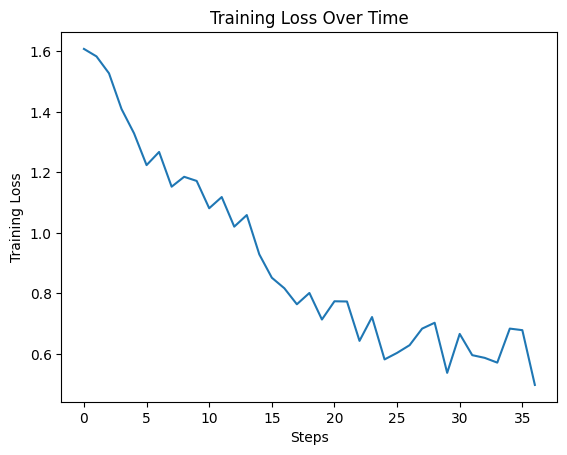

In [16]:
# Access the training history
training_history = trainer.state.log_history

# Extract the training loss values
train_loss_values = [entry['loss'] for entry in training_history if 'loss' in entry]

# Plot the training loss
plt.plot(train_loss_values)
plt.xlabel('Steps')
plt.ylabel('Training Loss')
plt.title('Training Loss Over Time')
plt.show()

The plot shows a decreasing trend in the training loss over time, which is a positive indicator. Initially, the loss starts relatively high (around 1.6), but as training progresses, the loss steadily decreases, eventually stabilizing below 0.6. This trend suggests that the model is learning effectively, as the reduction in loss indicates that the model is becoming better at minimizing errors on the training data. However, the small fluctuations near the end might suggest minor adjustments in the model's parameters as it approaches convergence.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


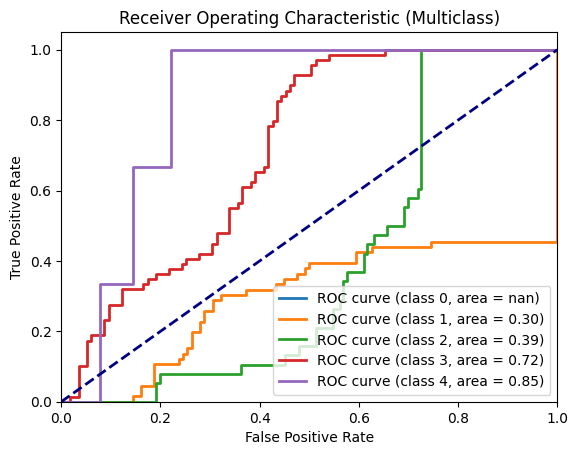

AUC score for class 0: nan
AUC score for class 1: 0.30
AUC score for class 2: 0.39
AUC score for class 3: 0.72
AUC score for class 4: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [18]:
# Get predictions
predictions = trainer.predict(tokenized_test)
predicted_labels = np.argmax(predictions.predictions, axis=1)

true_labels = test['sentiment'].tolist()

# Calculate probabilities for each class
probs = np.exp(predictions.predictions) / np.sum(np.exp(predictions.predictions), axis=1, keepdims=True)

# Calculate and plot ROC curve for each class
plt.figure()
for i in range(probs.shape[1]):
    fpr, tpr, thresholds = roc_curve(true_labels, probs[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (class %d, area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Multiclass)')
plt.legend(loc="lower right")
plt.show()

# Print AUC scores for each class
for i in range(probs.shape[1]):
    fpr, tpr, _ = roc_curve(true_labels, probs[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    print("AUC score for class %d: %0.2f" % (i, roc_auc))

ROC Curve Generation

        The code begins by setting up a figure for the ROC curves. It iterates through each class in the predictions (probs.shape[1]), calculating the FPR and TPR for each class using roc_curve() from sklearn.metrics. The pos_label=i parameter specifies the current class label.
        For each class, the ROC curve is plotted with a label indicating the class number and the Area Under the Curve (AUC) score, which quantifies the overall performance of the classifier for that class.
        A diagonal line (plt.plot([0, 1], [0, 1], color='navy', linestyle='--')) is included as a reference, representing a random classifier with an AUC of 0.5.

AUC Score Printing

        After plotting the ROC curves, the code iterates through the classes again to print the AUC scores for each class, which provides a numerical measure of the classifier's effectiveness.

Plot Interpretation

The plot displays the ROC curves for each class in a multiclass classification scenario. The AUC values indicate how well the model distinguishes between the true positive and false positive rates. For example, classes 3 and 4 have higher AUC values (0.72 and 0.85, respectively), indicating better performance, whereas classes 1 and 2 have lower AUC values (0.30 and 0.39), suggesting that the model struggles to distinguish these classes accurately. The nan value for class 0 implies that there were no positive samples for this class in the true labels, making the calculation of the ROC curve and AUC score invalid for this class. The warning messages at the bottom also reflect this issue.